In [16]:
import pandas as pd
import numpy as np
import numpy.random as rd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# reading data and removing unnamed column
df=pd.read_csv('airquality.txt', index_col=0)
df = pd.DataFrame(df);
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [2]:

# finding null values in each column
for i in df:
    print(f"Null values in column {i}:- {df[i].isna().sum()}")

Null values in column Ozone:- 37
Null values in column Solar.R:- 7
Null values in column Wind:- 0
Null values in column Temp:- 0
Null values in column Month:- 0
Null values in column Day:- 0


In [3]:
# calculating mean of ozone column
ozone_mean = df["Ozone"].mean()
ozone_mean

42.12931034482759

In [4]:
# calculating mean of Solar.R column
solar_mean = df["Solar.R"].mean()
solar_mean

185.93150684931507

In [5]:
# Replacing null values of ozone and Solar with their respective mean values
df["Ozone"].fillna(ozone_mean, inplace=True)
df["Solar.R"].fillna(solar_mean, inplace=True)
df

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.00000,190.000000,7.4,67,5,1
2,36.00000,118.000000,8.0,72,5,2
3,12.00000,149.000000,12.6,74,5,3
4,18.00000,313.000000,11.5,62,5,4
5,42.12931,185.931507,14.3,56,5,5
...,...,...,...,...,...,...
149,30.00000,193.000000,6.9,70,9,26
150,42.12931,145.000000,13.2,77,9,27
151,14.00000,191.000000,14.3,75,9,28
152,18.00000,131.000000,8.0,76,9,29


In [6]:
# Splitting Input feature and target variable
X = df[["Temp"]]
y = df[["Ozone"]]
X,y

(     Temp
 1      67
 2      72
 3      74
 4      62
 5      56
 ..    ...
 149    70
 150    77
 151    75
 152    76
 153    68
 
 [153 rows x 1 columns],
         Ozone
 1    41.00000
 2    36.00000
 3    12.00000
 4    18.00000
 5    42.12931
 ..        ...
 149  30.00000
 150  42.12931
 151  14.00000
 152  18.00000
 153  20.00000
 
 [153 rows x 1 columns])

In [11]:
# Splitting training and test dataset for both input feature and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test

(     Temp
 150    77
 152    76
 46     79
 19     68
 60     77
 ..    ...
 10     69
 104    86
 68     88
 118    86
 48     72
 
 [114 rows x 1 columns],
      Temp
 27     57
 136    77
 64     81
 106    80
 25     57
 8      59
 45     80
 102    92
 113    77
 55     76
 87     82
 95     82
 84     82
 140    67
 105    82
 41     87
 34     67
 112    78
 70     92
 120    97
 57     78
 9      61
 137    71
 81     85
 38     82
 99     89
 138    71
 61     83
 92     81
 52     77
 17     66
 127    93
 103    86
 93     81
 23     61
 67     83
 98     87
 139    78
 28     67,
         Ozone
 150  42.12931
 152  18.00000
 46   42.12931
 19   30.00000
 60   42.12931
 ..        ...
 10   42.12931
 104  44.00000
 68   77.00000
 118  73.00000
 48   37.00000
 
 [114 rows x 1 columns],
          Ozone
 27    42.12931
 136   28.00000
 64    32.00000
 106   65.00000
 25    42.12931
 8     19.00000
 45    42.12931
 102   42.12931
 113   21.00000
 55    42.12931
 87    20.00000
 

In [12]:
# Creating a linear regression model for dataset
lr = LinearRegression()
# fitting X_train and y_train
lr.fit(X_train, y_train)

LinearRegression()

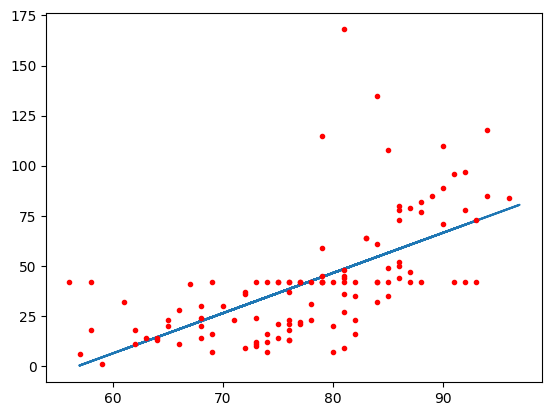

In [34]:
# predicting o
predictions = lr.predict(X_test)
plt.plot(X_test, predictions)
plt.plot(X_train, y_train, "r.")